In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as col
import numpy as np

In [3]:
def show(numpy_matrix):
    if numpy_matrix is not None:
        plt.imshow(numpy_matrix, cmap = col.ListedColormap(['white', 'black']))
        plt.xticks([])
        plt.yticks([])
        plt.show()

In [4]:

mat = np.array([[1,0,1], [0,1,1], [0,0,1]])
mat

array([[1, 0, 1],
       [0, 1, 1],
       [0, 0, 1]])

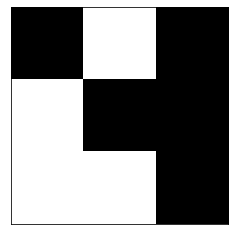

In [13]:
show(mat)

# 1) a-] Implémentez une fonction qui renvoie un tableau de longueur n rempli de zéros, avec des 1 aux extrêmités

In [14]:
def band(n):
    final_band = np.zeros(n)
    final_band[0] = 1
    final_band[n-1] = 1
    return final_band

# Une autre méthode sans numpy (un peu plus longue)
# This is another method on how to do the matrix table
def band2(n):
    final_band = []
    final_band.append(1)
    for i in range(n-2):
        final_band.append(0)
    final_band.append(1)
    return np.array(final_band)

# 1) b-] Implémentez la fonction square(p) pour obtenir le résultat suivant

In [15]:
def square(p):
    #retourne un carré de côté p avec une bande blanche
    final_square = None
    if p >  4:
        final_square = np.ones(np.power(p,2)).reshape((p,p))
        b = band(p)
        final_square[1] = b
        final_square[p-2] = b
        final_square[:,1] = b
        final_square[:,p-2] = b
    return final_square

square(5)


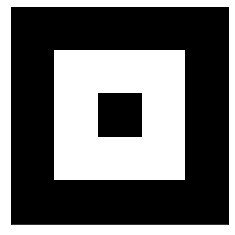

square(10)


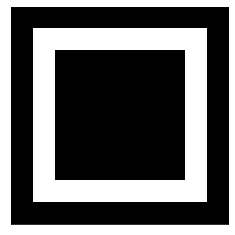

square(20)


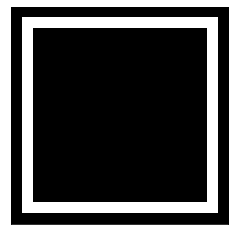

In [7]:
print('square(5)')
show(square(5))
print('square(10)')
show(square(10))
print('square(20)')
show(square(20))

# 2) Générer une fonction qui renvoie une grille de n*n carrés aléatoirement blancs ou noirs

In [16]:
def gen_random_grid(n):
    return np.random.randint(0, 2, np.power(n,2)).reshape(n,n)

def gen_random_grid2(n):
    grid = np.zeros(np.power(n,2)).reshape((n,n))
    for i in range(n):
        for j in range(n):
            grid[i][j] = np.random.randint(0, 2)
    return grid

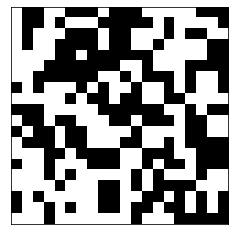

In [17]:

show(gen_random_grid(20))

# 3) Générer une fonction qui renvoie un faux QR-code de dimension n 

In [10]:
def gen_fakeQR(n, p):
    # taille de la grille n
    # taille des carrés p
    
    fakeQR = None
    
    if n > 2*p+1:
        
        #grille random
        fakeQR = gen_random_grid(n)
        
        #carrés
        s = square(p)
        fakeQR[0:p, 0:p] = s
        fakeQR[0:p, n-p:n] = s
        fakeQR[n-p:n, 0:p] = s
        
        fakeQR[n-p-1:n-p+4, n-p-1:n-p+4] = square(5)
        
        #bandes blanches autour des carrés
        fakeQR[0:p+1, p] = 0
        fakeQR[p, 0:p+1] = 0
        
        fakeQR[p, n-p:n] = 0
        fakeQR[n-p:n, p] = 0
        
        fakeQR[n-p-1, 0:p+1] = 0
        fakeQR[0:p+1, n-p-1] = 0
        
    return fakeQR

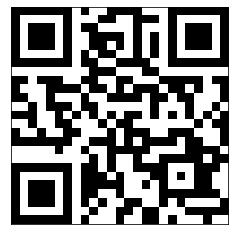

In [11]:
show(gen_fakeQR(25, 7))

# Exercice 2 : Jouons avec les pingouins

In [12]:
def show(numpy_matrix):
    if numpy_matrix is not None:
        plt.imshow(numpy_matrix)
        plt.xticks([])
        plt.yticks([])
        plt.show()

# 1) Chargez le fichier linux.txt, tranformez le en tableau, puis affichez le avec la fonction show

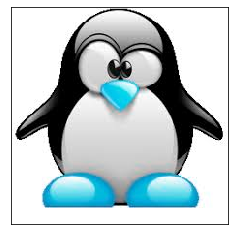

In [18]:
bgr_linux = np.loadtxt('linux.txt', delimiter = ',', dtype = int).reshape(225, 225, 3)
show(bgr_linux)

# 2) Les deux canaux rouges et bleus sont inversés, il faut les remettre dans l'ordre.

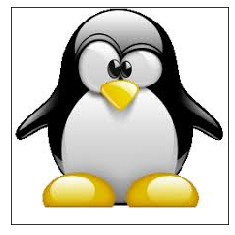

In [20]:

dim_x = bgr_linux.shape[0]
dim_y = bgr_linux.shape[1]

linux = np.copy(bgr_linux)

for i in range(dim_x):
    for j in range(dim_y):
        (r, g, b) = bgr_linux[i][j]
        linux[i][j] = (b, g, r)
show(linux)

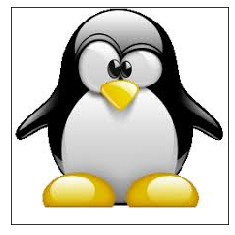

In [21]:
linux = np.copy(bgr_linux)
linux[:, :, 0] =  bgr_linux[:, :, 2]
linux[:, :, 2] =  bgr_linux[:, :, 0]

show(linux)

In [22]:

linux_rose = np.array(linux)
linux_rose[:, :, 2] =  linux[:, :, 0]

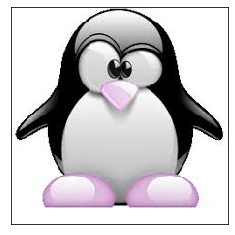

In [23]:
show(linux_rose)

In [18]:
linux_vert = np.array(linux)
linux_vert[:, :, 0] =  linux[:, :, 2]

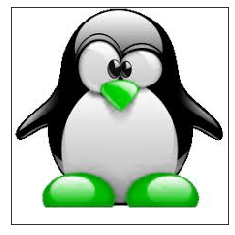

In [19]:
show(linux_vert)

# 3) Retournez le pingouin de linux horizontalement, puis verticalement

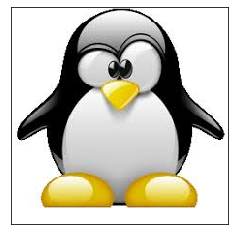

In [20]:

show(np.flip(linux,1))

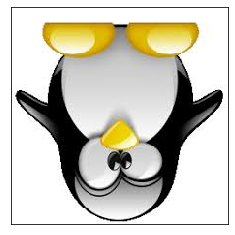

In [21]:

show(np.flip(linux,0))

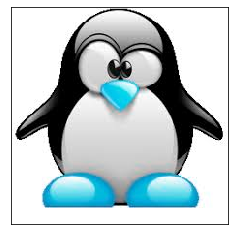

In [22]:

show(np.flip(linux,-1))

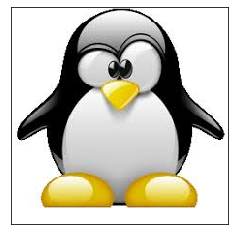

In [23]:

show(np.flip(linux,-2))

# 4) Affichez une image avec deux pingouins côte à côte, puis une image avec quatre pingouins disposés en carré

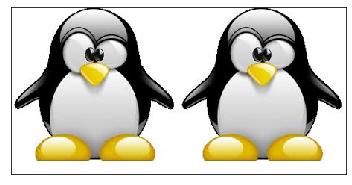

In [24]:
two_ping = np.hstack((linux,linux))
show(two_ping)

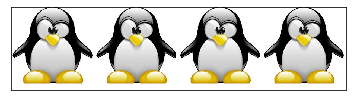

In [25]:
four_ping = np.hstack((two_ping,two_ping))
show(four_ping)

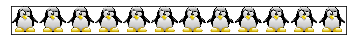

In [26]:
twelve_ping = np.hstack((four_ping,four_ping,four_ping))
show(twelve_ping)

# 5) Zoomez sur la tête du pingouin

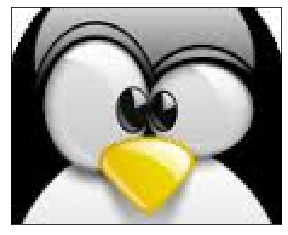

In [27]:
show(linux[int(len(linux)/10):int(len(linux)/2),int(len(linux)/4):int(len(linux)*3/4)])

# 6) Transformez l'image en noir et blanc

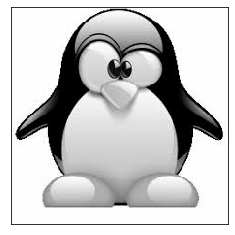

In [28]:
gray_linux = np.copy(linux)

for i in range(linux.shape[0]):
    for j in range(linux.shape[1]):
        gray_linux[i][j]=0.2989*linux[i][j][0]+ 0.5870*linux[i][j][1]+ 0.1140*linux[i][j][2]

show(gray_linux)

# 7) Blending ; Mix d'images

### a-] Chargez le fichier github.txt

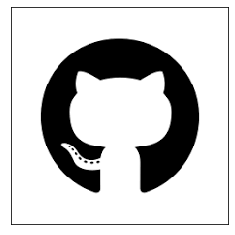

In [29]:
github = np.loadtxt('github.txt', delimiter = ',', dtype = int).reshape(225, 225, 3)
show(github)

### b-] Mixez les images linux et github

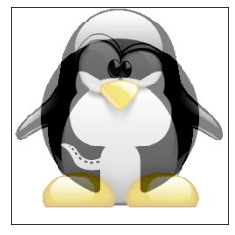

In [30]:
blend = np.array(np.zeros(dim_x*dim_y*3).reshape(dim_x, dim_y, 3), dtype = int)

alpha = 0.5

for i in range(dim_x):
    for j in range(dim_y):
        (linr, ling, linb) = linux[i][j]
        (gitr, gitg, gitb) = github[i][j]
        blend[i][j] = (alpha*linr+(1-alpha)*gitr, alpha*ling+(1-alpha)*gitg, alpha*linb+(1-alpha)*gitb)
show(blend)

# Mix méthode 2

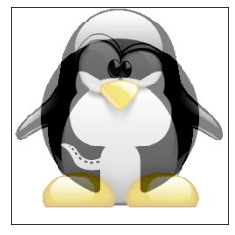

In [31]:
show(np.array(alpha*linux+(1-alpha)*github, dtype = int))

### c-] Créez une transition de github à linux

0.0


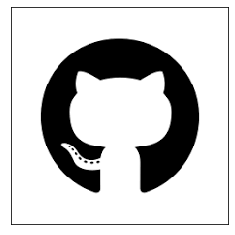

0.1


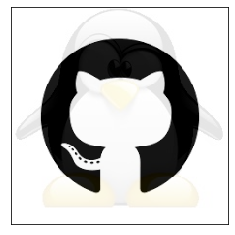

0.2


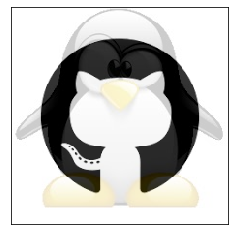

0.30000000000000004


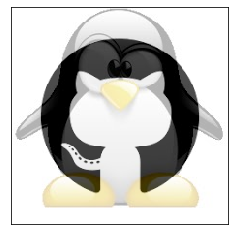

0.4


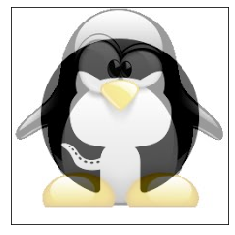

0.5


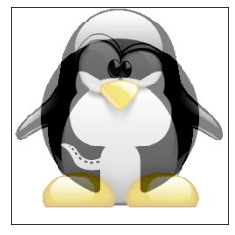

0.6000000000000001


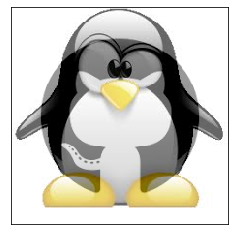

0.7000000000000001


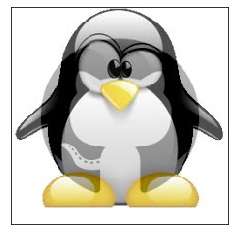

0.8


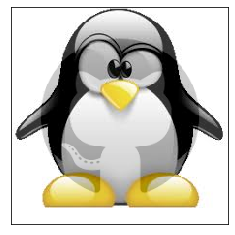

0.9


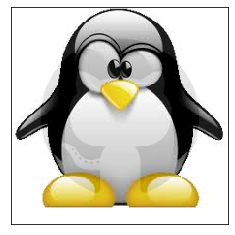

1.0


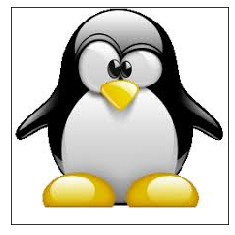

In [32]:
for alpha in np.arange(0,1.01,0.1):
    print(alpha)
    show(np.array(alpha*linux+(1-alpha)*github, dtype = int))

# 8) Flouter l'image à l'aide d'une convolution

### a-] Créez un tableau de taille 5 de nombres aléatoires entre 0 et 100

In [6]:
alea = np.random.randint(0,100,5)
alea

array([22, 92, 34, 53, 12])

### b-] Triez le dans l'ordre croissant, stockez le résultat

In [8]:
left = np.sort(alea)
left

array([12, 22, 34, 53, 92])

### c-] Triez dans l'ordre décroissant, stockez le résultat

In [9]:
right = -np.sort(-alea)
right

array([92, 53, 34, 22, 12])

### d-] À l'aide de b-] et c-], générez un tableau symétrique de taille 10, dans lequel les valeurs les plus élevées se trouvent au centre du tableau

In [10]:
res = np.hstack((left, right))
res

array([12, 22, 34, 53, 92, 92, 53, 34, 22, 12])

### e-] Normaliser le tableau (diviser tous ses éléments par sa somme)

In [11]:
kernel = res/np.sum(res)
kernel

array([0.02816901, 0.05164319, 0.07981221, 0.12441315, 0.21596244,
       0.21596244, 0.12441315, 0.07981221, 0.05164319, 0.02816901])

### f-] Pour chaque ligne de pixels, et pour chaque canal de couleur de l'image du pingouin linux, convoluer les pixels par le tableau obtenu en e-]

In [24]:
blur_linux = np.copy(linux)
for j in range(3):
    for i in range(225):
        blur_linux[:,:,j][i] = np.convolve(linux[:,:,j][i], kernel, mode ='same')

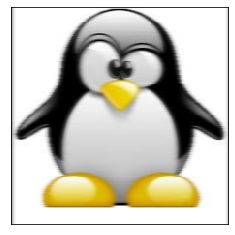

In [25]:
show(blur_linux)